In [23]:
import pandas as pd
import numpy as np
import os
import ISLP
import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
from matplotlib.pyplot import subplots

In [11]:
print(os.getcwd())
os.chdir('/Users/spencervenancio/Downloads/Personal Projects/ISLP/exercises/ch03')
print(os.getcwd())

/Users/spencervenancio/Downloads/Personal Projects/ISLP/exercises/ch03
/Users/spencervenancio/Downloads/Personal Projects/ISLP/exercises/ch03


## 8. This question involves the use of simple linear regression on the `Auto` data set.
--- 

**(a)** Use the `sm.OLS()` function to perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor. Use the `summarize()` function to print the results. Comment on the output. For example:

1. Is there a relationship between the predictor and the response?  
2. How strong is the relationship between the predictor and the response?  
3. Is the relationship between the predictor and the response positive or negative?  
4. What is the predicted `mpg` associated with a `horsepower` of 98? What are the associated 95 % confidence and prediction intervals?

---

**(b)** Plot the response and the predictor in a new set of axes `ax`. Use the `ax.axline()` method or the `abline()` function defined in the lab to display the least squares regression line.

---

**(c)** Produce some diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.


In [16]:
auto = ISLP.load_data("Auto")

In [18]:
len(auto)

392

In [20]:
auto = ISLP.load_data('Auto')
X = pd.DataFrame({'intercept' : np.ones(len(auto)), 'horsepower': auto['horsepower']})
y = auto['mpg']
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 24 May 2025   Prob (F-statistic):           7.03e-81
Time:                        12:47:02   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> - We see a strong relationship between the predictors and the response variable. This shown by low $p$-values which are displaying as 0.
> - We note that this relationship is negative meaning that an increase in `horsepower` is associated with a decrease in `mpg`.
> - We say this relationship is weak because the coef. is close to 0 but because of the $p$-value we also say the relationship is significant.
> - $\hat{y} = 39.9359 - 0.1578(98)$ = 24.46707715, the 95% C.I. is [23.97307896, 24.96107534] and the 95% P.I is [14.80939607, 34.12475823]

In [22]:
pred = pd.DataFrame({"intercept": [1], "horspower": [98]})
pred_vals = results.get_prediction(pred)
print(pred_vals.predicted_mean)
print(pred_vals.conf_int(alpha = 0.05))
print(pred_vals.conf_int(obs = True, alpha = 0.05))

[24.46707715]
[[23.97307896 24.96107534]]
[[14.80939607 34.12475823]]


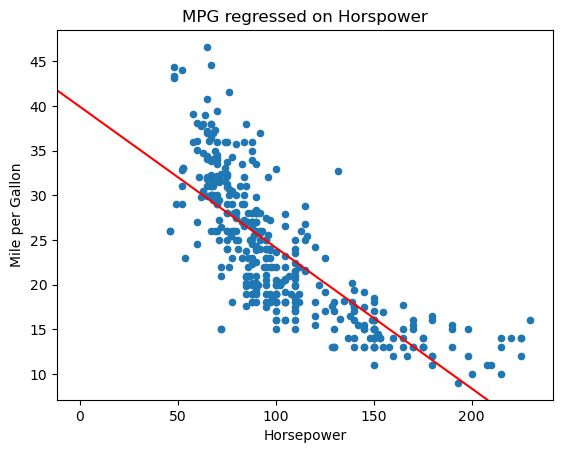

In [24]:
ax = auto.plot.scatter(y= 'mpg', x= 'horsepower')
ax.set_ylabel('Mile per Gallon')
ax.set_xlabel('Horsepower')
ax.set_title('MPG regressed on Horspower')
ax.axline((0,39.9359), slope = -0.1578, color ='red'); 

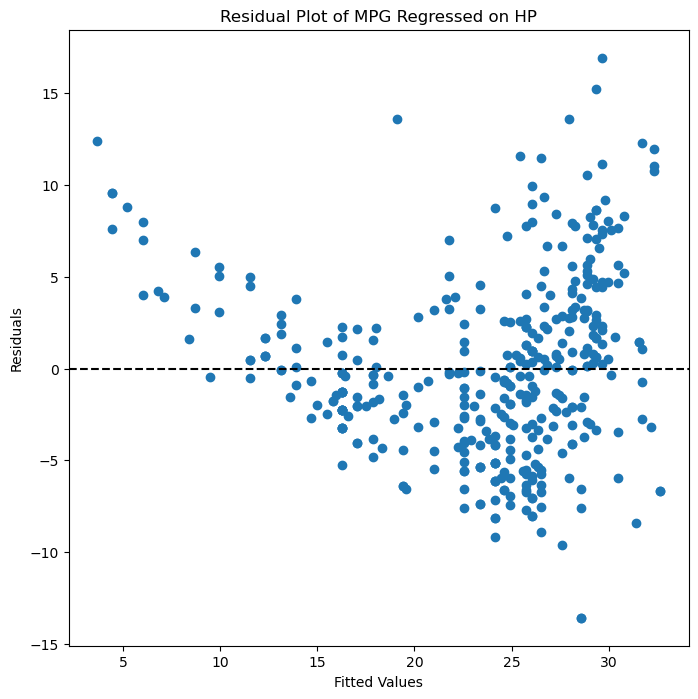

In [26]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(x =results.fittedvalues, y= results.resid)
ax.axhline(0, color = 'black', linestyle = '--' )
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
ax.set_title('Residual Plot of MPG Regressed on HP'); 

> We are seeing clear violations of homoscedasticity and linear relationship. 

In [214]:
def resid_plot(result_obj): 
    """ Creates a residual plot from a sm. results object """
    ax = subplots(figsize=(8,8))[1]
    ax.scatter(x =result_obj.fittedvalues, y= result_obj.resid)
    ax.axhline(0, color = 'black', linestyle = '--' )
    ax.set_xlabel('Fitted Values')
    ax.set_ylabel('Residuals')
    ax.set_title('Residual Plot')
    return print()

## 9. This question involves the use of multiple linear regression on the `Auto` data set.
---

**(a)** Produce a scatterplot matrix which includes all of the variables in the data set.

**(b)** Compute the matrix of correlations between the variables using the `DataFrame.corr()` method.

**(c)** Use the `sm.OLS()` function to perform a multiple linear regression with `mpg` as the response and all other variables except `name` as the predictors. Use the `summarize()` function to print the results. Comment on the output. For instance:
1. Is there a relationship between the predictors and the response? Use the `anova_lm()` function from `statsmodels` to answer this question.  
2. Which predictors appear to have a statistically significant relationship to the response?  
3. What does the coefficient for the `year` variable suggest?  

**(d)** Produce some diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

**(e)** Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?

**(f)** Try a few different transformations of the variables, such as `log(X)`, `√X`, `X²`. Comment on your findings.


In [155]:
cols = auto.columns.drop('mpg', 'name')
df = auto[cols]
df['intercept'] = 1
X = df; y = auto['mpg']
#print(X, y)
model = sm.OLS(y,X)
results2 = model.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 19 May 2025   Prob (F-statistic):          2.04e-139
Time:                        20:37:48   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


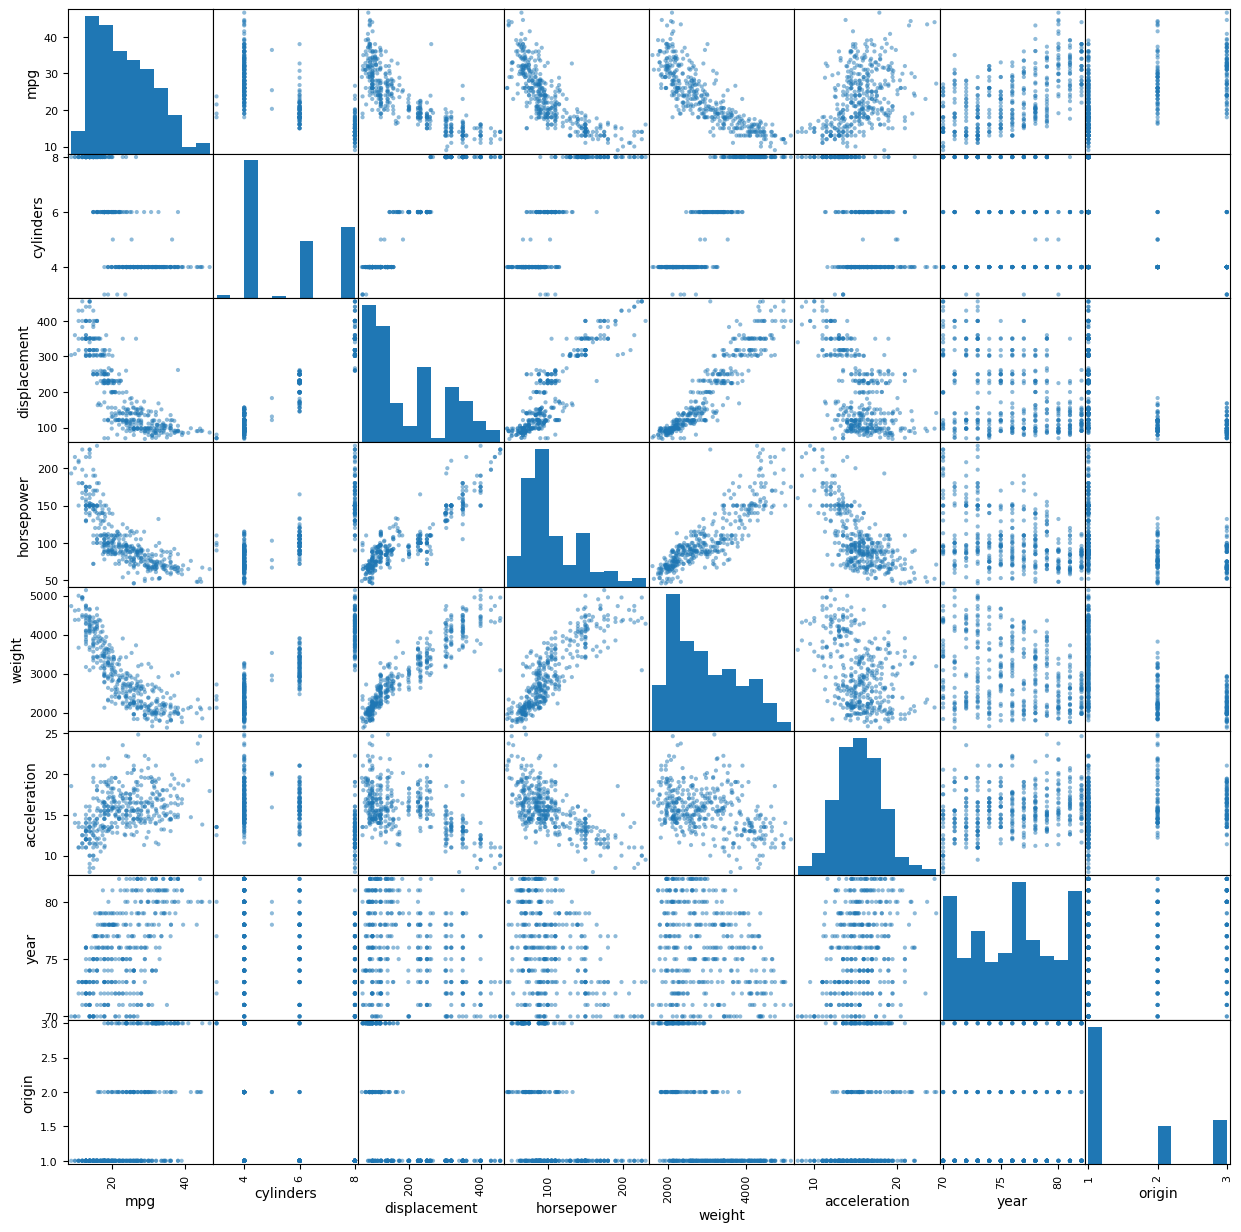

In [17]:
pd.plotting.scatter_matrix(auto, figsize=(15,15));
auto.corr()

115

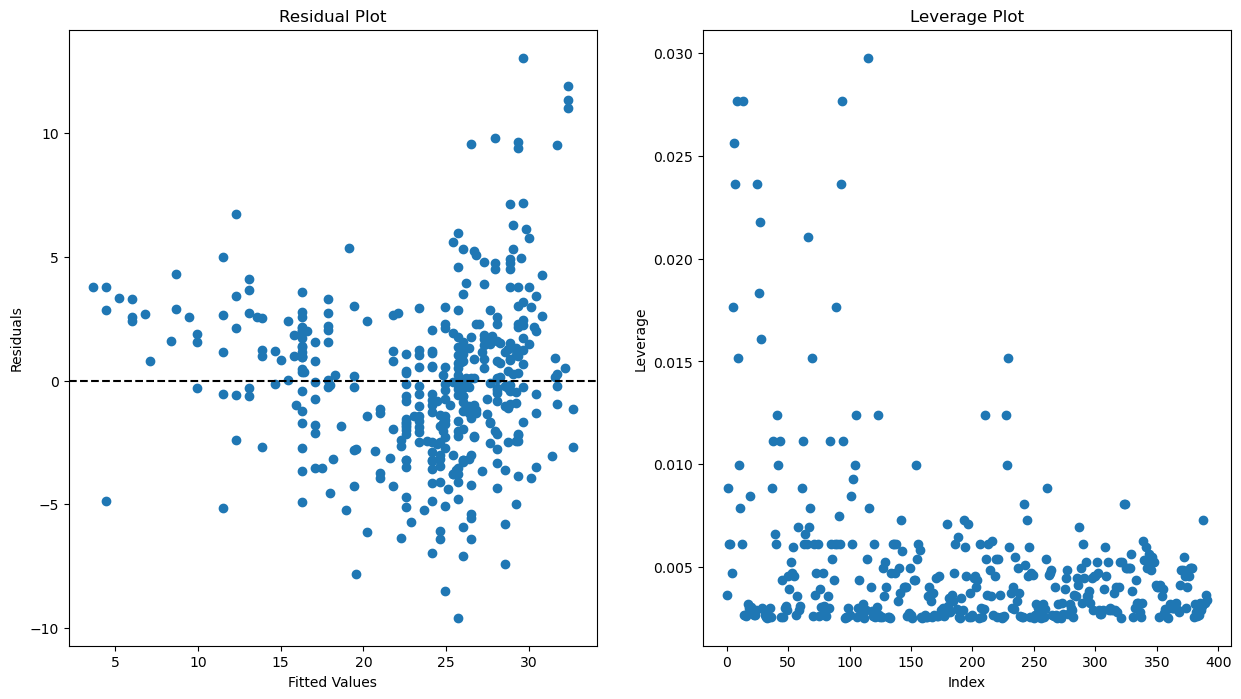

In [19]:
fig, axes = subplots(figsize=(15,8), ncols = 2)
    
axes[0].scatter(x =results.fittedvalues, y= results2.resid)
axes[0].axhline(0, color = 'black', linestyle = '--' )
axes[0].set_xlabel('Fitted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residual Plot');

infl = results.get_influence()
axes[1].scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Leverage')
axes[1].set_title('Leverage Plot');

np.argmax(infl.hat_matrix_diag)

In [99]:
df['displacement_horsepower'] = df['displacement'] * df['horsepower']
df['weight_horsepower'] = df['weight'] * df['horsepower']
df['displacement_weight'] = df['weight'] * df['displacement']
X = df.copy()
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     246.4
Date:                Mon, 19 May 2025   Prob (F-statistic):          1.46e-159
Time:                        20:20:49   Log-Likelihood:                -967.10
No. Observations:                 392   AIC:                             1956.
Df Residuals:                     381   BIC:                             2000.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
cylinders                   0.4563      0.317      1.440      0.151      -0.167       1.079
displacement               -0.0621      0.024     -2.601      0.010      -0.109      -0.015
horsepower                 -0.1832      0.047     -3.866      0.000      -0.276      -0.090
weight                     -0.0067      0.002     -4.309      0.000      -0.010      -0.004
acceleration               -0.1416      0.098     -1.452      0.147      -0.333       0.050
year                        0.7563      0.045     16.835      0.000       0.668       0.845
origin                      0.6220      0.264      2.360      0.019       0.104       1.140
intercept                  -0.0407      4.679     -0.009      0.993      -9.240       9.158
displacement_horsepower     0.0003   9.62e-05      3.252      0.001       0.000       0.001
weight_horsepower        1.404e-05   1.51e-05      0.927      0.354   -1.57e-05    4.38e-05
displacement_weight      5.599e-06   5.44e-06      1.030      0.304   -5.09e-06    1.63e-05
==============================================================================
Omnibus:                       45.726   Durbin-Watson:                   1.518
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.409
Skew:                           0.649   Prob(JB):                     8.58e-21
Kurtosis:                       4.993   Cond. No.                     2.99e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
df['acceleration_sqd'] = df['acceleration'] ** 2 
df['log_horsepower'] = np.log(df['horsepower'])
copy_df = df.copy()
X = copy_df[copy_df.columns.drop(['weight_horsepower' ,'weight_horsepower','cylinders', 'origin' ])] 
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     276.4
Date:                Mon, 19 May 2025   Prob (F-statistic):          2.85e-161
Time:                        20:31:26   Log-Likelihood:                -965.97
No. Observations:                 392   AIC:                             1952.
Df Residuals:                     382   BIC:                             1992.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
displacement               -0.0643      0.012     -5.375      0.000      -0.088      -0.041
horsepower                  0.0193      0.077      0.250      0.803      -0.132       0.171
weight                     -0.0073      0.001     -5.887      0.000      -0.010      -0.005
acceleration               -1.6767      0.544     -3.084      0.002      -2.746      -0.608
year                        0.7720      0.045     17.232      0.000       0.684       0.860
intercept                  44.8482     19.220      2.333      0.020       7.058      82.639
displacement_horsepower  4.922e-05      0.000      0.406      0.685      -0.000       0.000
displacement_weight      1.571e-05   3.72e-06      4.221      0.000    8.39e-06     2.3e-05
acceleration_sqd            0.0456      0.016      2.814      0.005       0.014       0.078
log_horsepower             -9.7192      5.614     -1.731      0.084     -20.757       1.318
==============================================================================
Omnibus:                       37.659   Durbin-Watson:                   1.542
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.169
Skew:                           0.492   Prob(JB):                     7.15e-20
Kurtosis:                       5.105   Cond. No.                     1.16e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 10. This question should be answered using the `Carseats`data set.

**(a)** Fit a multiple regression model to predict Sales using Price,
Urban, and US.

In [25]:
carseats = ISLP.load_data('Carseats')
carseats['intercept'] = np.ones(carseats.shape[0])
carseats['Urban'] = carseats[['Price','Urban', 'US']].Urban.map({"No": 0, "Yes":1})
carseats['US'] = carseats[['Price','Urban', 'US']].US.map({"No": 0, "Yes":1})
X = carseats[['intercept', 'Price', 'Urban', 'US']]
y = carseats['Sales']
model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Fri, 30 May 2025   Prob (F-statistic):           2.39e-23
Time:                        17:51:01   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban         -0.0219      0.272     -0.081      0.936      -0.556       0.512
US             1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**(b)** Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

> `intercept` = 13.0435, and we interpret this number by saying we would predict that a carseat with 0 cost, at a store not in the US, and not urban would sell ~ 13 units.
> 
> `Price` =	-0.0545, meaning a 1 dollar increase in price is associated with a decrease of  ~ 55 units (0.05*1000) holding all else constant.
> 
> `Urban` =	-0.0219, meaning the store being in an Urban location is associated with a decrease in sales by ~ 22 units holding all else constant.
> 
> `US` = 1.2006, meaning the store being in the US is associated with a increase in sales by ~ 1200 units holding all else constant.

**(c)** Write out the model in equation form, being careful to handle the qualitative variables properly.

>$$\hat{y} = 13.04  - 0.06 \texttt{price} - 0.02I_\texttt{urban} + 1.2I_\texttt{US}$$ 
>
>Where $I_\texttt{urban}$ and $I_\texttt{US}$ are indicator variables.

**(d)** For which of the predictors can you reject the null hypothesis $H_0: \beta_j  = 0 $ 

> Using the $p$-value from the summary output, we can see that all but `Urban` are statistally significant with sigificance $\alpha = 0.01$.

**(e)** On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [27]:
X = X[X.columns.drop('Urban')]
y = carseats['Sales']
model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Fri, 30 May 2025   Prob (F-statistic):           2.66e-24
Time:                        17:51:05   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US             1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> $R^2$ stays the same for both models while the smaller model has an improvement in adjusted $R^2$ by 0.001. The F-statistic sees larger jumps but the F-statistic for the model in (a) already had a $p$-value of 2.39e-23, so a decrease there doesn't seem particularly meaningful. Overall model (e) is an improvement (all our variables are now significant) but not by a huge margin. 

0

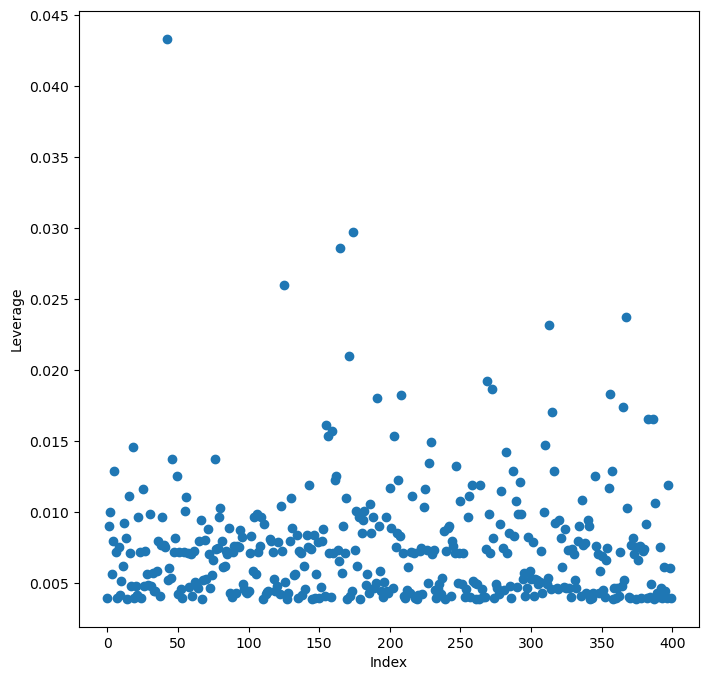

In [67]:
inf = fit.get_influence()
fig, ax = subplots(figsize = (8,8))
ax.scatter(np.arange(X.shape[0]),inf.hat_matrix_diag)
ax.set_ylabel('Leverage')
ax.set_xlabel('Index');
np.argmax(inf)

> yes we see a high-leverage point at index 0

## 11. In this problem we will investigate the t-statistic for the null hypothesis $H_0: \beta = 0$ in simple linear regression without an intercept. To begin, we generate a predictor x and a response y as follows

In [72]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

**(a)** Perform a simple linear regression of $y$ onto $x$, without an intercept. Report the coefficient estimate $\hat{\beta}$, the standard error of this coefficient estimate, and the t-statistic and $p$-value associated with the null hypothesis $H_0: \beta = 0$. Comment on these results. (You can perform regression without an intercept using the keywords argument `intercept=False` to `ModelSpec()`.)

In [104]:
model = sm.OLS(endog = x,exog = y)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Fri, 30 May 2025   Prob (F-statistic):                    6.23e-31
Time:                        18:31:20   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3757      0.022     16.898      0.000       0.332       0.420
==============================================================================
Omnibus:                       13.156   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.596
Skew:                          -0.528   Prob(JB):                     1.24e-05
Kurtosis:                       5.075   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> From this we get $\hat{\beta}$ = 0.3757, with $\text{SE}(\hat{\beta})$ = 0.022, $t$ = 16.898 with associated $p$-value $\approx$ 0. Because the $p$-value is so low, we are confident that the true $\hat{\beta} \ne 0$.

In [106]:
model = sm.OLS(endog = y,exog = x)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Fri, 30 May 2025   Prob (F-statistic):                    6.23e-31
Time:                        18:32:02   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9762      0.117     16.898      0.000       1.744       2.208
==============================================================================
Omnibus:                        1.376   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                0.847
Skew:                           0.121   Prob(JB):                        0.655
Kurtosis:                       3.381   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> From this we get $\hat{\beta}$ = 1.9762, with $\text{SE}(\hat{\beta})$ = 0.117, $t$ = 16.898 with associated $p$-value $\approx$ 0. Because the $p$-value is so low, we are confident that the true $\hat{\beta} \ne 0$.


**(c)** What is the relationship between the results obtained in (a) and (b)?

> 

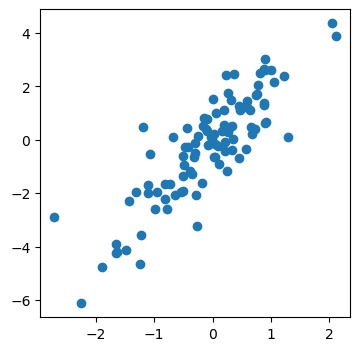

In [122]:
ax = subplots(figsize=(4,4))[1]
ax.scatter(x,y);